In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving framingham.csv to framingham (2).csv


In [ ]:
dataset= pd.read_csv('framingham.csv')

In [ ]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.shape

(4238, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.00,4238.00,4133.00,4238.00,4209.00,4185.00,4238.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
mean,0.43,49.58,1.98,0.49,9.00,0.03,0.01,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


**Data Pre-processing**

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Since the number of rows with missing values are only',round((count/len(dataset.index))*100), '% of the entire dataset given, we decide to drop the rows with the missing or NaN values.')

Total number of rows with missing values is  582
Since the number of rows with missing values are only 14 % of the entire dataset given, we decide to drop the rows with the missing or NaN values.


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
dataset.shape

(3656, 16)

In [ ]:
dataset.mean()

male                0.44
age                49.56
education           1.98
currentSmoker       0.49
cigsPerDay          9.02
BPMeds              0.03
prevalentStroke     0.01
prevalentHyp        0.31
diabetes            0.03
totChol           236.87
sysBP             132.37
diaBP              82.91
BMI                25.78
heartRate          75.73
glucose            81.86
TenYearCHD          0.15
dtype: float64

**Removing outliers**

<Axes: >

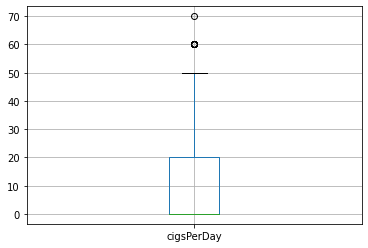

In [ ]:
dataset.boxplot(column='cigsPerDay')

In [ ]:
dataset.loc[dataset['cigsPerDay'] > 59, 'cigsPerDay'] = 9.02

<Axes: >

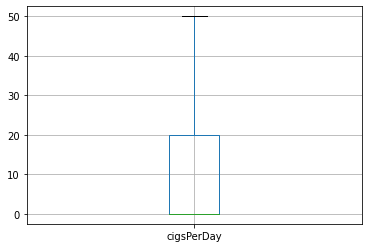

In [ ]:
dataset.boxplot(column='cigsPerDay') #after removing outliers

In [ ]:
dataset['totChol'].describe()

count   3656.00
mean     236.87
std       44.10
min      113.00
25%      206.00
50%      234.00
75%      263.25
max      600.00
Name: totChol, dtype: float64

<Axes: >

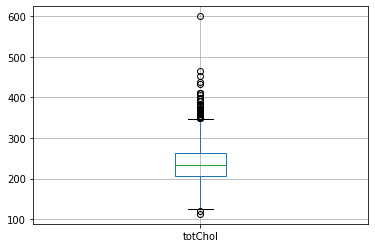

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset.loc[dataset['totChol'] > 480, 'totChol'] = 237

<Axes: >

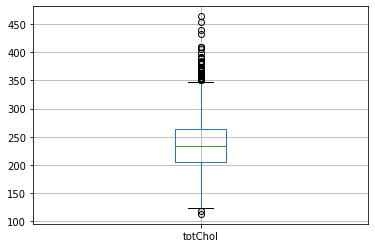

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset['sysBP'].describe()

count   3656.00
mean     132.37
std       22.09
min       83.50
25%      117.00
50%      128.00
75%      144.00
max      295.00
Name: sysBP, dtype: float64

<Axes: >

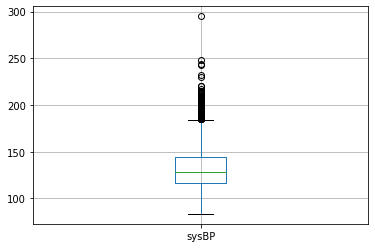

In [ ]:
dataset.boxplot(column='sysBP')

In [ ]:
dataset.loc[dataset['sysBP'] > 270, 'sysBP'] = dataset['sysBP'].median()

<Axes: >

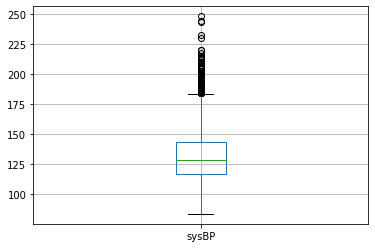

In [ ]:
dataset.boxplot(column='sysBP') #After removing the outliers

In [ ]:
dataset['BMI'].describe()

count   3656.00
mean      25.78
std        4.07
min       15.54
25%       23.08
50%       25.38
75%       28.04
max       56.80
Name: BMI, dtype: float64

<Axes: >

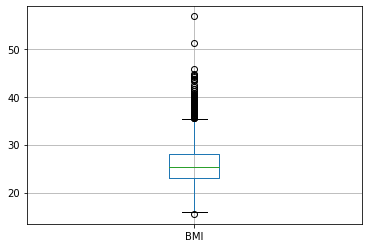

In [ ]:
dataset.boxplot(column='BMI')

In [ ]:
dataset.loc[dataset['BMI'] > 49, 'BMI'] = dataset['BMI'].median()

<Axes: >

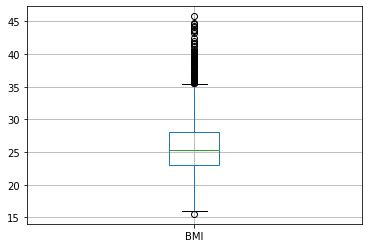

In [ ]:
dataset.boxplot(column='BMI') #After removing the outliers

In [ ]:
dataset['heartRate'].describe()

count   3656.00
mean      75.73
std       11.98
min       44.00
25%       68.00
50%       75.00
75%       82.00
max      143.00
Name: heartRate, dtype: float64

<Axes: >

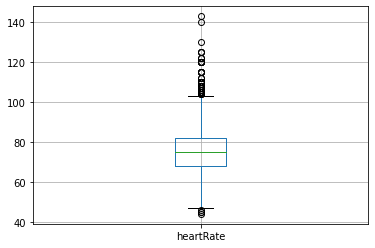

In [ ]:
dataset.boxplot(column='heartRate')

In [ ]:
dataset['glucose'].describe()

count   3656.00
mean      81.86
std       23.91
min       40.00
25%       71.00
50%       78.00
75%       87.00
max      394.00
Name: glucose, dtype: float64

<Axes: >

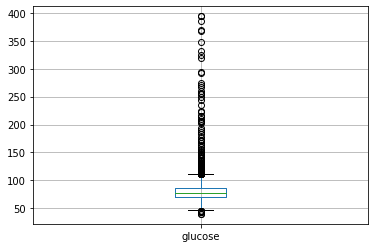

In [ ]:
dataset.boxplot(column='glucose')

Above we observed that the Glucose level and Heart Rate have not been changed although their boxplots show some outliers, i.e., becuase these levels differ variedly from person to person and can be too high or too low depending upon the person's health.

**EDA PROCESS**

EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset. EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

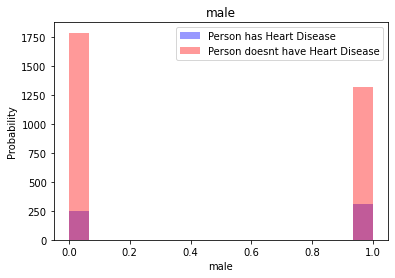

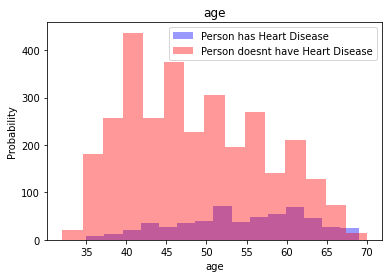

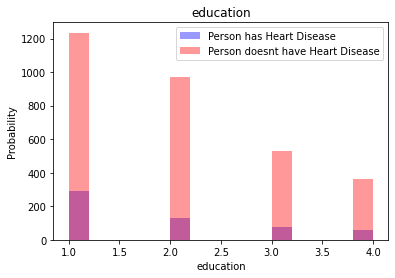

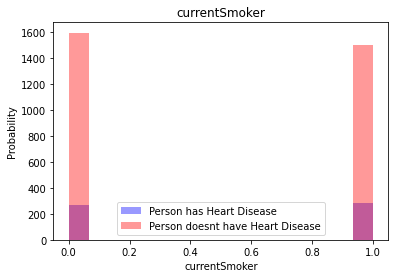

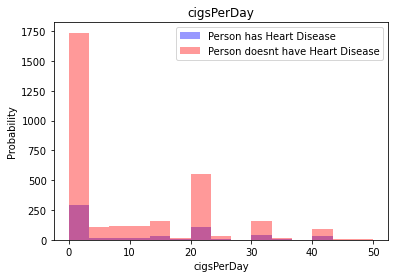

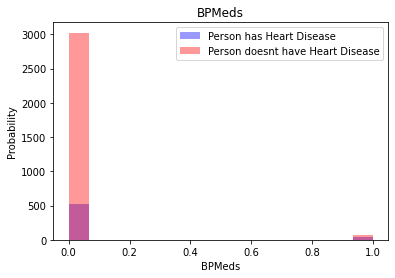

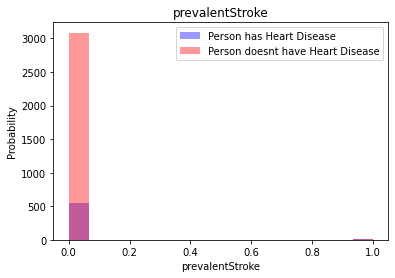

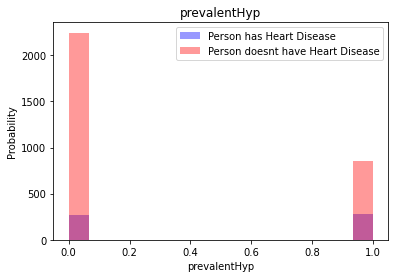

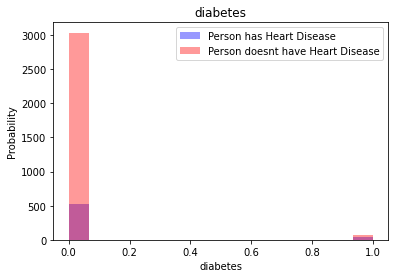

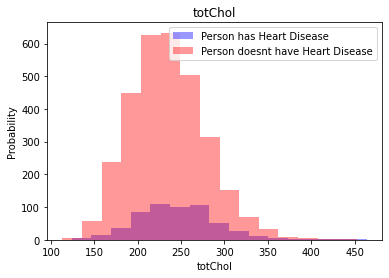

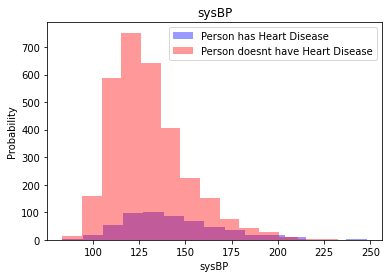

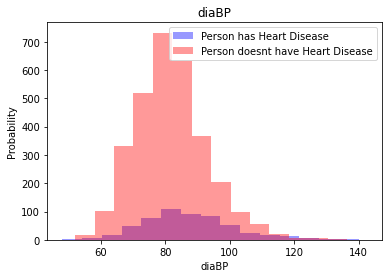

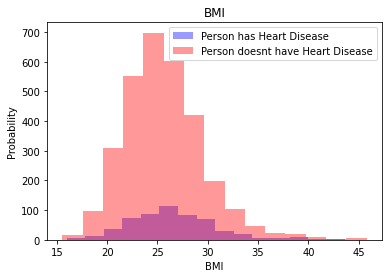

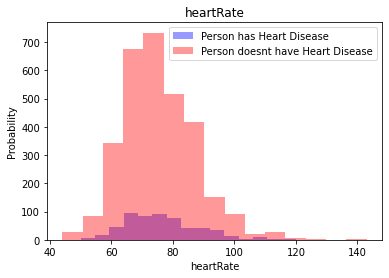

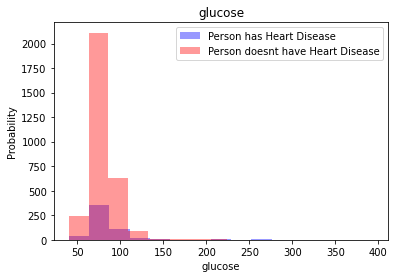

In [ ]:
for i in range(len(dataset.columns[:-1])):
    label = dataset.columns[i]
    plt.hist(dataset[dataset['TenYearCHD'] == 1][label], color = 'blue', label= 'Person has Heart Disease' ,alpha = 0.4, bins=15)
    plt.hist(dataset[dataset['TenYearCHD'] == 0][label], color = 'red', label= 'Person doesnt have Heart Disease', alpha = 0.4, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.00,-0.02,0.02,0.21,0.33,-0.05,-0.00,0.00,0.01,-0.07,-0.04,0.05,0.08,-0.11,0.00,0.09
age,-0.02,1.00,-0.16,-0.21,-0.19,0.13,0.05,0.31,0.11,0.27,0.39,0.21,0.14,-0.00,0.12,0.23
education,0.02,-0.16,1.00,0.03,0.02,-0.01,-0.03,-0.08,-0.04,-0.01,-0.12,-0.06,-0.14,-0.06,-0.03,-0.06
currentSmoker,0.21,-0.21,0.03,1.00,0.78,-0.05,-0.04,-0.11,-0.04,-0.05,-0.13,-0.12,-0.16,0.05,-0.05,0.02
cigsPerDay,0.33,-0.19,0.02,0.78,1.00,-0.05,-0.04,-0.08,-0.04,-0.04,-0.10,-0.06,-0.09,0.06,-0.05,0.06
BPMeds,-0.05,0.13,-0.01,-0.05,-0.05,1.00,0.11,0.26,0.05,0.10,0.27,0.20,0.10,0.01,0.05,0.09
prevalentStroke,-0.00,0.05,-0.03,-0.04,-0.04,0.11,1.00,0.07,0.01,0.01,0.06,0.06,0.01,-0.02,0.02,0.05
prevalentHyp,0.00,0.31,-0.08,-0.11,-0.08,0.26,0.07,1.00,0.08,0.17,0.70,0.62,0.30,0.15,0.09,0.18
diabetes,0.01,0.11,-0.04,-0.04,-0.04,0.05,0.01,0.08,1.00,0.04,0.10,0.05,0.09,0.06,0.61,0.09
totChol,-0.07,0.27,-0.01,-0.05,-0.04,0.10,0.01,0.17,0.04,1.00,0.22,0.17,0.12,0.09,0.04,0.09


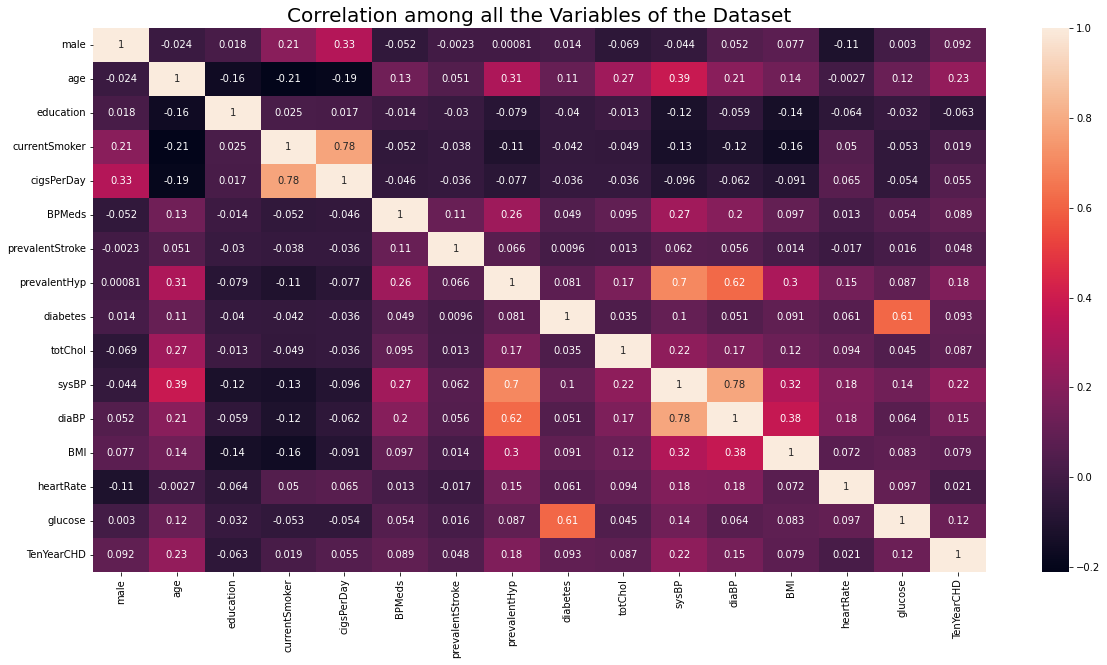

In [ ]:
import seaborn as sns
cor=dataset.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

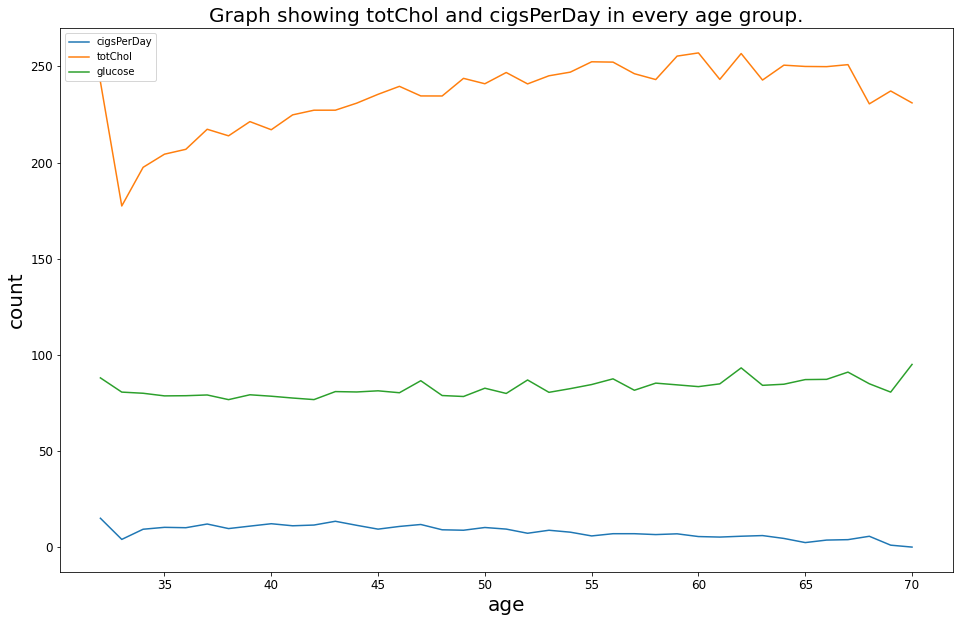

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = dataset.groupby("age").cigsPerDay.mean()
graph_6 = dataset.groupby("age").totChol.mean()
graph_7 = dataset.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose.

totChol has a steep, linear and inverse graph for lower ranges of age

cigsPerDay has a fairly parallel relationship with age

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

In [ ]:
dataset.shape #after preprocessing

(3656, 16)

In [ ]:
dataset['TenYearCHD'].value_counts() #Return the count of unique elements in TenYearCHD column

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [ ]:
Y2 = dataset['TenYearCHD']
X2 = dataset.drop(['TenYearCHD'], axis=1)

# Split the dataset into training and testing sets
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x2 = scaler.fit_transform(train_x2)
test_x2 = scaler.transform(test_x2)

**Classification Algorithms**

**1. Extra tree classifier**

Accuracy: 0.8306010928961749
Precision: 0.4444444444444444
Recall: 0.06557377049180328
F1-score: 0.1142857142857143
Confusion Matrix: 
 [[600  10]
 [114   8]]


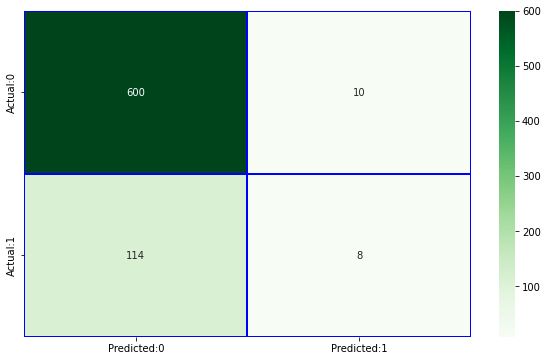

In [ ]:
# Train the Extra Trees Classifier on the training data
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf1.fit(train_x2, train_y2)

# Predict on the test data
y_pred1 = clf1.predict(test_x2)

from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
acc1 = accuracy_score(test_y2, y_pred1)
print('Accuracy:', acc1)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision1 = precision_score(test_y2, y_pred1)
recall1 = recall_score(test_y2, y_pred1)
f1_1 = f1_score(test_y2, y_pred1)

# Print the results
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_1)

conf_mat1 = confusion_matrix(test_y2, y_pred1)
print('Confusion Matrix: \n', conf_mat1)

#Plotting the confusion matrix
conf_matrix1 = pd.DataFrame(data = conf_mat1,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**2. Bagging classifier**

Accuracy: 0.8319672131147541
Precision: 0.42857142857142855
Recall: 0.02459016393442623
F1-score: 0.04651162790697675
Confusion Matrix: 
 [[606   4]
 [119   3]]


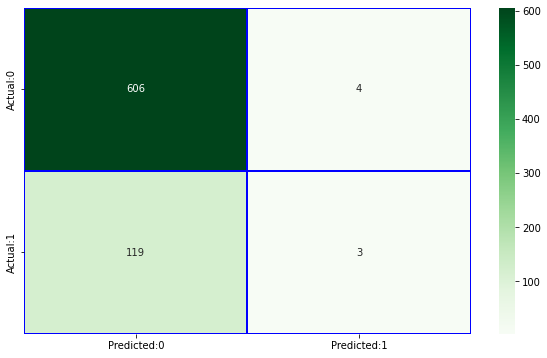

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=4)

# Define the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the Bagging Classifier to the training data
bagging_clf.fit(train_x2, train_y2)

# Predict the target on the test data
y_pred2 = bagging_clf.predict(test_x2)

# Calculate the accuracy, precision, recall, and F1-score
accuracy2 = accuracy_score(test_y2, y_pred2)
precision2 = precision_score(test_y2, y_pred2)
recall2 = recall_score(test_y2, y_pred2)
f1_2 = f1_score(test_y2, y_pred2)

# Print the results
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_2)

conf_mat2 = confusion_matrix(test_y2, y_pred2)
print('Confusion Matrix: \n', conf_mat2)

#Plotting the confusion matrix
conf_matrix2 = pd.DataFrame(data = conf_mat2,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**3. CNN**

Epoch 1/10
74/74 [==============================] - 2s 11ms/step - loss: 0.4831 - accuracy: 0.8341 - val_loss: 0.3882 - val_accuracy: 0.8701
Epoch 2/10
74/74 [==============================] - 0s 4ms/step - loss: 0.4019 - accuracy: 0.8465 - val_loss: 0.3854 - val_accuracy: 0.8701
Epoch 3/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8465 - val_loss: 0.3981 - val_accuracy: 0.8701
Epoch 4/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8465 - val_loss: 0.3808 - val_accuracy: 0.8701
Epoch 5/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8487 - val_loss: 0.3916 - val_accuracy: 0.8513
Epoch 6/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8504 - val_loss: 0.3832 - val_accuracy: 0.8513
Epoch 7/10
74/74 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8546 - val_loss: 0.3947 - val_accuracy: 0.8462
Epoch 8/10
74/74 [=

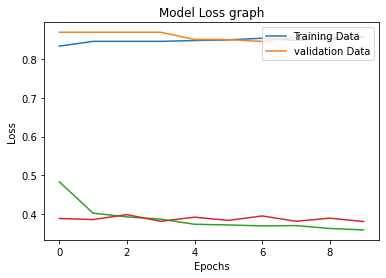

In [ ]:
model3 = keras.Sequential([
    #keras.layers.Flatten(input_shape =(13,)),
    keras.layers.Dense(60, activation = 'relu', input_shape= (15,)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid' )
])

#compiling the network

model3.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

#training the neural network
history = model3.fit(train_x2, train_y2, validation_split=0.2, epochs = 10)

#Visualizing Accuracy and Losses
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'upper right')

#model evaluation
loss, accuracy3 = model3.evaluate(test_x2, test_y2)
print(accuracy3)

from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for test set
y_pred3 = model3.predict(test_x2)
y_pred3 = np.argmax(y_pred3, axis=1)

# Calculate precision, recall, F1 score, and support
target_names = ['class 0', 'class 1']
print(classification_report(test_y2, y_pred3, target_names=target_names))

# Calculate confusion matrix
print(confusion_matrix(test_y2, y_pred3))


**4. Logistic regression**

Training accuracy: 0.8587551299589603
Testing accuracy: 0.8387978142076503
Confusion Matrix: 
 [[606   4]
 [114   8]]
Accuracy:  0.8387978142076503
Precision: 0.6666666666666666
Recall: 0.06557377049180328
F1-score: 0.11940298507462688
Classification Report is:

               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.67      0.07      0.12       122

    accuracy                           0.84       732
   macro avg       0.75      0.53      0.52       732
weighted avg       0.81      0.84      0.78       732



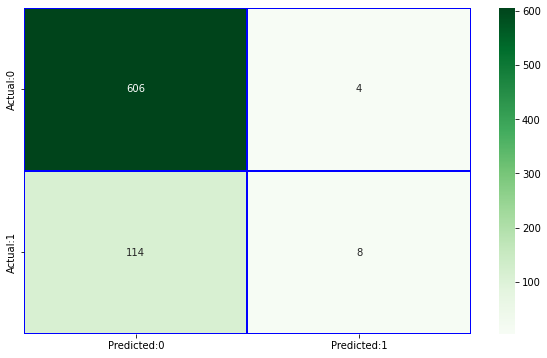

In [ ]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(train_x2, train_y2) #Training the data

from sklearn.metrics import accuracy_score
# Evaluate the model on the training set
train_preds4 = model4.predict(train_x2)
train_acc4 = accuracy_score(train_y2, train_preds4)

# Evaluate the model on the testing set
test_preds4 = model4.predict(test_x2)
test_acc4 = accuracy_score(test_y2, test_preds4)

# Print the training and testing accuracies
print("Training accuracy:", train_acc4)
print("Testing accuracy:", test_acc4)

# Make predictions on the testing data
y_pred4 = model4.predict(test_x2)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
conf_mat4 = confusion_matrix(test_y2, y_pred4)
acc4 = accuracy_score(test_y2, y_pred4)
print('Confusion Matrix: \n', conf_mat4)
print('Accuracy: ', acc4)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision4 = precision_score(test_y2, y_pred4)
recall4 = recall_score(test_y2, y_pred4)
f1_4 = f1_score(test_y2, y_pred4)

# Print the results
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f1_4)

from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report is:\n\n",classification_report(test_y2,y_pred4))  #classification report

#Plotting the confusion matrix
conf_matrix4 = pd.DataFrame(data = conf_mat4,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix4, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()


**5. Decision tree**

In [ ]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x2,train_y2)
dt_predicted = dt.predict(test_x2)
dt_conf_matrix = confusion_matrix(test_y2, dt_predicted)
dt_acc_score = accuracy_score(test_y2, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y2,dt_predicted))

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision5 = precision_score(test_y2, dt_predicted)
recall5 = recall_score(test_y2, dt_predicted)
f1_5 = f1_score(test_y2, dt_predicted)

# Print the results
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f1_5)

confussion matrix
[[525  85]
 [ 86  36]]


Accuracy of DecisionTreeClassifier: 76.63934426229508 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       610
           1       0.30      0.30      0.30       122

    accuracy                           0.77       732
   macro avg       0.58      0.58      0.58       732
weighted avg       0.77      0.77      0.77       732

Precision: 0.2975206611570248
Recall: 0.29508196721311475
F1-score: 0.2962962962962963


**6. Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
m6 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x2,train_y2)
gvc_predicted = gvc.predict(test_x2)
gvc_conf_matrix = confusion_matrix(test_y2, gvc_predicted)
gvc_acc_score = accuracy_score(test_y2, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y2,gvc_predicted))


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision6 = precision_score(test_y2, gvc_predicted)
recall6 = recall_score(test_y2, gvc_predicted)
f1_6 = f1_score(test_y2, gvc_predicted)

# Print the results
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f1_6)

confussion matrix
[[602   8]
 [109  13]]


Accuracy of Gradient Boosting Classifier: 84.01639344262296 

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       610
           1       0.62      0.11      0.18       122

    accuracy                           0.84       732
   macro avg       0.73      0.55      0.55       732
weighted avg       0.81      0.84      0.79       732

Precision: 0.6190476190476191
Recall: 0.10655737704918032
F1-score: 0.18181818181818182


**7. XGBOOST**

In [ ]:
import xgboost as xgb
# Create an XGBoost classifier
clf7 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Train the classifier
clf7.fit(train_x2, train_y2)

# Make predictions on the test set
y_pred7 = clf7.predict(test_x2)

# Evaluate the performance of the classifier
accuracy7 = accuracy_score(test_y2, y_pred7)
print('Accuracy:', accuracy7)

cm7 = confusion_matrix(test_y2, y_pred7)
print('Confusion matrix:\n', cm7)

cr7 = classification_report(test_y2, y_pred7)
print('Classification report:\n', cr7)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision7 = precision_score(test_y2, y_pred7)
recall7 = recall_score(test_y2, y_pred7)
f1_7 = f1_score(test_y2, y_pred7)

# Print the results
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f1_7)

Accuracy: 0.8128415300546448
Confusion matrix:
 [[581  29]
 [108  14]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       610
           1       0.33      0.11      0.17       122

    accuracy                           0.81       732
   macro avg       0.58      0.53      0.53       732
weighted avg       0.76      0.81      0.77       732

Precision: 0.32558139534883723
Recall: 0.11475409836065574
F1-score: 0.1696969696969697


**8. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier with 100 trees
clf8 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf8.fit(train_x2, train_y2)

# Make predictions on the test set
y_pred8 = clf8.predict(test_x2)

# Evaluate the performance of the classifier
accuracy8 = accuracy_score(test_y2, y_pred8)
print('Accuracy:', accuracy8)

cm8 = confusion_matrix(test_y2, y_pred8)
print('Confusion matrix:\n', cm8)

cr8 = classification_report(test_y2, y_pred8)
print('Classification report:\n', cr8)


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision8 = precision_score(test_y2, y_pred8)
recall8 = recall_score(test_y2, y_pred8)
f1_8 = f1_score(test_y2, y_pred8)

# Print the results
print("Precision:", precision8)
print("Recall:", recall8)
print("F1-score:", f1_8)

Accuracy: 0.837431693989071
Confusion matrix:
 [[603   7]
 [112  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.59      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.72      0.54      0.53       732
weighted avg       0.80      0.84      0.78       732

Precision: 0.5882352941176471
Recall: 0.08196721311475409
F1-score: 0.14388489208633093


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### importing breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(train_x2, test_x2, train_y2, test_y2)

100%|██████████| 29/29 [00:07<00:00,  4.11it/s]


In [ ]:
models # Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.67,0.64,0.64,0.71,0.03
BernoulliNB,0.80,0.60,0.60,0.79,0.03
LabelSpreading,0.79,0.57,0.57,0.77,1.23
LabelPropagation,0.78,0.56,0.56,0.77,1.11
PassiveAggressiveClassifier,0.82,0.56,0.56,0.79,0.02
GaussianNB,0.80,0.55,0.55,0.78,0.02
AdaBoostClassifier,0.83,0.55,0.55,0.78,0.23
KNeighborsClassifier,0.83,0.55,0.55,0.79,0.16
LinearDiscriminantAnalysis,0.84,0.54,0.54,0.79,0.10
